In [1]:
import warnings
import numpy as np
import pandas as pd
import gensim as gs
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [41]:
read_file = pd.read_csv('dataset/new_train_dataset_1_5', delimiter=',', header=None)
train_dataset = read_file.iloc[0:100000,:].values

In [3]:
read_file = pd.read_csv('dataset/new_validation_dataset_1_5', delimiter=',', header=None)
validation_dataset = read_file.iloc[:,:].values

In [4]:
embedding_model = gs.models.FastText.load_fasttext_format('pre_trained_models/cc.en.300.bin')

In [5]:
def sequence_padding(X_DIM, value):
    
    value_padding = np.pad(value, ((0,40 - X_DIM),(0,0)), 'constant')
    
    return value_padding

In [42]:
left_train = []
rigth_train = []
label = []

for articleID, articleTitle, tableID, tableTitle, match in tqdm(train_dataset):
    
    value1 = list(str(articleTitle))
    
    if len(value1) < 40:
        
        embedding1 = embedding_model.wv[value1]
        padding_embedding1 = sequence_padding(embedding1.shape[0],embedding1)
        left_train.append(padding_embedding1)
    
    else:
        
        embedding1 = embedding_model.wv[value1[0:40]]
        left_train.append(embedding1)
    
    
    value2 = list(str(tableTitle))
    
    if len(value2) < 40:
        
        embedding2 = embedding_model.wv[value2]
        padding_embedding2 = sequence_padding(embedding2.shape[0],embedding2)
        rigth_train.append(padding_embedding2)
    
    else:
        
        embedding2 = embedding_model.wv[value2[0:40]]
        rigth_train.append(embedding2)
    
    
    label.append(match)

100%|██████████| 100000/100000 [03:42<00:00, 450.10it/s]


In [43]:
left_train = np.array(left_train)
rigth_train = np.array(rigth_train)
label_train = np.array(label)

MemoryError: 

In [ ]:
left_train.shape

In [9]:
left_validation = []
rigth_validation = []
label_validation = []

for articleID, articleTitle, tableID, tableTitle, match in tqdm(validation_dataset):
    
    value1 = list(str(articleTitle))
    
    if len(value1) < 40:
        
        embedding1 = embedding_model.wv[value1]
        padding_embedding1 = sequence_padding(embedding1.shape[0],embedding1)
        left_validation.append(padding_embedding1)
    
    else:
        
        embedding1 = embedding_model.wv[value1[0:40]]
        left_validation.append(embedding1)
    
    
    value2 = list(str(tableTitle))
    
    if len(value2) < 40:
        
        embedding2 = embedding_model.wv[value2]
        padding_embedding2 = sequence_padding(embedding2.shape[0],embedding2)
        rigth_validation.append(padding_embedding2)
    
    else:
        
        embedding2 = embedding_model.wv[value2[0:40]]
        rigth_validation.append(embedding2)
    
    
    label_validation.append(match)

100%|██████████| 16623/16623 [00:32<00:00, 514.49it/s]


In [10]:
left_validation = np.array(left_validation)
rigth_validation = np.array(rigth_validation)
label_validation = np.array(label_validation)

In [11]:
left_validation.shape

(16623, 40, 300)

In [12]:
def sequence_padding1(X_DIM, value):
    
    value_padding = np.pad(value, ((0,9 - X_DIM),(0,0)), 'constant')
    
    return value_padding

In [ ]:
left_train1 = []
rigth_train1 = []

for articleID, articleTitle, tableID, tableTitle, match in tqdm(train_dataset):
    
    value1 = tknzr.tokenize(str(articleTitle))
    
    if len(value1) < 9:
        
        embedding1 = embedding_model.wv[value1]
        padding_embedding1 = sequence_padding1(embedding1.shape[0],embedding1)
        left_train1.append(padding_embedding1)
    
    else:
        
        embedding1 = embedding_model.wv[value1[0:9]]
        left_train1.append(embedding1)
    
    
    value2 = tknzr.tokenize(str(tableTitle))
    
    if len(value2) < 9:
        
        embedding2 = embedding_model.wv[value2]
        padding_embedding2 = sequence_padding1(embedding2.shape[0],embedding2)
        rigth_train1.append(padding_embedding2)
    
    else:
        
        embedding2 = embedding_model.wv[value2[0:9]]
        rigth_train1.append(embedding2)

In [ ]:
left_train1 = np.array(left_train1)
rigth_train1 = np.array(rigth_train1)

In [ ]:
left_train1.shape

In [16]:
left_validation1 = []
rigth_validation1 = []

for articleID, articleTitle, tableID, tableTitle, match in tqdm(validation_dataset):
    
    value1 = tknzr.tokenize(str(articleTitle))
    
    if len(value1) < 9:
        
        embedding1 = embedding_model.wv[value1]
        padding_embedding1 = sequence_padding1(embedding1.shape[0],embedding1)
        left_validation1.append(padding_embedding1)
    
    else:
        
        embedding1 = embedding_model.wv[value1[0:9]]
        left_validation1.append(embedding1)
    
    
    value2 = tknzr.tokenize(str(tableTitle))
    
    if len(value2) < 9:
        
        embedding2 = embedding_model.wv[value2]
        padding_embedding2 = sequence_padding1(embedding2.shape[0],embedding2)
        rigth_validation1.append(padding_embedding2)
    
    else:
        
        embedding2 = embedding_model.wv[value2[0:9]]
        rigth_validation1.append(embedding2)


100%|██████████| 16623/16623 [00:13<00:00, 1206.13it/s]


In [17]:
left_validation1 = np.array(left_validation1)
rigth_validation1 = np.array(rigth_validation1)

In [18]:
left_validation1.shape

(16623, 9, 300)

In [19]:
def coattention_method(query, document):
    
    transpose_document = tf.transpose(document,perm=[0, 2, 1])
    
    affinity = tf.matmul(query,transpose_document)
    
    return affinity

In [20]:
def attention_model():
    
    query = tf.keras.Input(shape=(40,300), dtype='float32')
    document = tf.keras.Input(shape=(40,300), dtype='float32')
    
    query1 = tf.keras.Input(shape=(9,300), dtype='float32')
    document1 = tf.keras.Input(shape=(9,300), dtype='float32')
    
    conv1 = tf.keras.layers.Conv1D(8, kernel_size=3, activation='relu')(query)
    conv2 = tf.keras.layers.Conv1D(8, kernel_size=3, activation='relu')(document)
    flatten1 = tf.keras.layers.Flatten()(conv1)
    flatten2 = tf.keras.layers.Flatten()(conv2)
    concat_flatten = tf.keras.layers.concatenate([flatten1,flatten2], axis=-1)
    
    encodding_query = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(query1)
    encodding_document = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(document1)
    co_attention = coattention_method(encodding_query,encodding_document)
    flatten_affinity = tf.keras.layers.Flatten()(co_attention)
    
    final = tf.keras.layers.concatenate([concat_flatten,flatten_affinity], axis=-1)
    
    prediction = tf.keras.layers.Dense(1,activation='sigmoid')(final)
    
    model = tf.keras.Model(inputs=[query,document, query1, document1],outputs=prediction)
    
    return model

In [21]:
model = attention_model()

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 9, 300)]     0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 40, 300)]    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 40, 300)]    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 9, 300)]     0                                            
______________________________________________________________________________________________

In [23]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=['accuracy'])

In [24]:
history = model.fit([left_train, rigth_train, left_train1, rigth_train1], label_train, 
          epochs=10, 
          batch_size=32, 
          validation_data=([left_validation, rigth_validation, left_validation1, rigth_validation1], label_validation))
          #callbacks=callbacks_list)

Train on 50000 samples, validate on 16623 samples
Epoch 1/10
50000/50000 [==============================] - 161s 3ms/sample - loss: 0.2489 - accuracy: 0.9048 - val_loss: 0.2170 - val_accuracy: 0.9154
Epoch 2/10
50000/50000 [==============================] - 126s 3ms/sample - loss: 0.1843 - accuracy: 0.9289 - val_loss: 0.2082 - val_accuracy: 0.9180
Epoch 3/10
50000/50000 [==============================] - 126s 3ms/sample - loss: 0.1408 - accuracy: 0.9476 - val_loss: 0.2153 - val_accuracy: 0.9185
Epoch 4/10
50000/50000 [==============================] - 124s 2ms/sample - loss: 0.1032 - accuracy: 0.9624 - val_loss: 0.2386 - val_accuracy: 0.9152
Epoch 5/10
50000/50000 [==============================] - 124s 2ms/sample - loss: 0.0715 - accuracy: 0.9746 - val_loss: 0.2834 - val_accuracy: 0.9090
Epoch 6/10
50000/50000 [==============================] - 121s 2ms/sample - loss: 0.0477 - accuracy: 0.9833 - val_loss: 0.3164 - val_accuracy: 0.9126
Epoch 7/10
50000/50000 [==========================

In [53]:
model.save('model_char_embedding.h5')

In [25]:
y_prob = model.predict([left_validation,rigth_validation, left_validation1,rigth_validation1])

In [26]:
y_prob = (y_prob > 0.5).astype(np.int)

In [27]:
accuracy_score(label_validation, y_prob)

0.9179450159417675

In [28]:
classes=[0,1]
con_mat = tf.math.confusion_matrix(labels=label_validation, predictions=y_prob).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

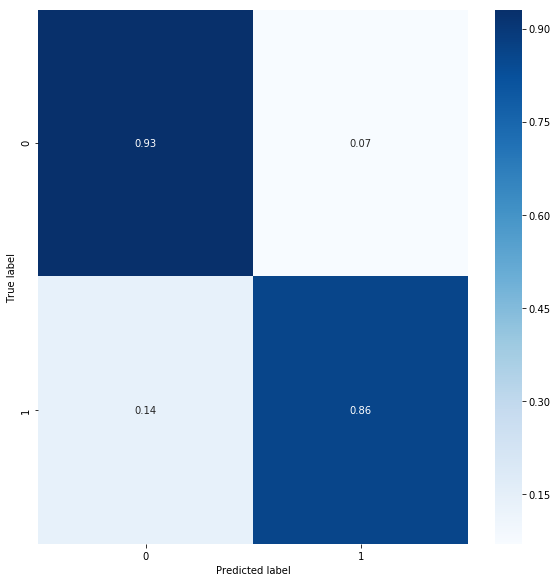

In [29]:
import seaborn as sns;
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
from elasticsearch import Elasticsearch
indexing_tables = Elasticsearch()

In [31]:
raw_articles = pd.read_csv('dataset/test_dataset', delimiter=',', header=None)
data_articles = raw_articles.iloc[:,:].values

In [32]:
def search_indexing(query):
    
    result= indexing_tables.search(
        index="tables", 
        body = {
        "_source": ["tablePgID","tablePgTitle"],
        "from" : 0,
        "size" : 1000,
        "query": {
            "multi_match":{
              "type": "most_fields",
              "query":    query, 
              "fields": ["tablePgTitle","tableHeader","tableBody"] 
            }
        }
    })
    
    return result

In [33]:
def get_accuracy(ID_goal,ranked_tables_ID):
    
    accuracy = 0
    
    for table_ID in ranked_tables_ID:
        
        if table_ID == ID_goal:
    
            accuracy = 1
            break;

    return accuracy

In [34]:
def search_index(article_title):
    
    tables_index = []

    result_index = search_indexing(article_title)
        
    for hit in result_index['hits']['hits']:
    
        table_ID = hit['_source']['tablePgID']
        
        table_page_title = hit['_source']['tablePgTitle']
    
        tables_index.append([table_ID,table_page_title])
    
    return tables_index

In [35]:
def create_embedding(value):

    value = list(str(value))
    
    if len(value) < 40:
        
        embedding = embedding_model.wv[value]
        
        padding_embedding = sequence_padding(embedding.shape[0],embedding)
        
        return padding_embedding
        
    else:
        
        embedding = embedding_model.wv[value[0:40]]
        
        return embedding

In [37]:
def create_embedding1(value):

    value = list(str(value))
    
    if len(value) < 9:
        
        embedding = embedding_model.wv[value]
        
        padding_embedding = sequence_padding1(embedding.shape[0],embedding)
        
        return padding_embedding
        
    else:
        
        embedding = embedding_model.wv[value[0:9]]
        
        return embedding

In [18]:
ranking_model = tf.keras.models.load_model('model_char_embedding.h5')

In [36]:
ranking_model = model

In [39]:
def run_search(k):
    
    TOP_K = k
    accuracy = []
    
    for article_ID, article_title, article_text, meta_description, summary, keywords, meta_keywords, tags in tqdm(data_articles[0:100]):
    
        embedding_left = []
        embedding_rigth = []
        embedding_left1 = []
        embedding_rigth1 = []
        ranked_tables_model = []
    
        catch = article_title+" "+summary+" "+keywords
        
        ranked_tables_index = search_index(catch)
        
        article_title_embedding = create_embedding(article_title)
        article_title_embedding1 = create_embedding1(article_title)
        
        for table_ID, table_title in (ranked_tables_index):
        
            table_title_embedding = create_embedding(str(table_title))
            table_title_embedding1 = create_embedding1(str(table_title))
            
            embedding_left.append(article_title_embedding)
            embedding_rigth.append(table_title_embedding)
            
            embedding_left1.append(article_title_embedding1)
            embedding_rigth1.append(table_title_embedding1)
    
        embedding_left = np.array(embedding_left)
        embedding_rigth = np.array(embedding_rigth)
        
        embedding_left1 = np.array(embedding_left1)
        embedding_rigth1 = np.array(embedding_rigth1)
    
        table_ranking_model = ranking_model.predict([embedding_left,embedding_rigth, embedding_left1,embedding_rigth1])
    
        for i in range(0,len(table_ranking_model)):
        
            ranked_tables_model.append([ranked_tables_index[i][0],ranked_tables_index[i][1],table_ranking_model[i][0]]) 
        
        data_frame = pd.DataFrame(ranked_tables_model, columns = ['table_ID', 'table_title','table_ranking']) 
        data_frame_sorting = data_frame.sort_values('table_ranking', ascending=False)
        final_ranked_tables = data_frame_sorting.iloc[0:TOP_K,0:1].values
           
        accuracy.append(get_accuracy(article_ID, final_ranked_tables))
        #print(accuracy)
        
    print("")
    print("Acc@"+str(k))
    print(str(round(np.mean(accuracy),4)))
    #print(accuracy)

In [40]:
accuracy_K = [100]

for k in accuracy_K:
     
    run_search(k)

100%|██████████| 100/100 [04:37<00:00,  2.77s/it]


Acc@100
0.14
